### Apply ML algorithms

- Decision Tree Regressor


In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("F:\CLASS\CSE498R(Directed Research)\Dataset\DhakaNew\CombineDhakaDataset.csv")

In [4]:
data.head()

D      T     TM     Tm      SLP      H    VV     V    VM    AQI  \
0  Jan-01  21.10  27.60  14.80  1018.80  66.00  1.80  0.60  3.50  388.0   
1       2  21.50  27.00  14.20  1018.00  64.00  2.60  2.40  9.40  312.0   
2       3  20.90  25.80  14.80  1016.50  63.00  2.60  2.20  9.40  305.0   
3       4  19.94  24.91  14.77  1015.23  65.27  1.94  1.91  6.12  307.0   
4       5  19.94  24.91  14.77  1015.23  65.27  1.94  1.91  6.12  294.0   

  Category  
0       EU  
1       EU  
2       EU  
3       EU  
4       VU

In [5]:
data.shape

(1738, 11)

In [6]:
data = data.drop(['D'], axis = 1)
data

T     TM     Tm      SLP      H    VV     V    VM    AQI Category
0     21.10  27.60  14.80  1018.80  66.00  1.80  0.60  3.50  388.0       EU
1     21.50  27.00  14.20  1018.00  64.00  2.60  2.40  9.40  312.0       EU
2     20.90  25.80  14.80  1016.50  63.00  2.60  2.20  9.40  305.0       EU
3     19.94  24.91  14.77  1015.23  65.27  1.94  1.91  6.12  307.0       EU
4     19.94  24.91  14.77  1015.23  65.27  1.94  1.91  6.12  294.0       VU
...     ...    ...    ...      ...    ...   ...   ...   ...    ...      ...
1733  19.40  25.00  15.60  1012.50  62.00  3.40  1.90  3.50  324.0       EU
1734  20.55  26.27  16.14  1013.55  71.38  2.79  1.21  4.59  371.0       EU
1735  20.55  26.27  16.14  1013.55  71.38  2.79  1.21  4.59  348.0       EU
1736  20.55  26.27  16.14  1013.55  71.38  2.79  1.21  4.59  309.0       EU
1737  19.90  26.30  15.20  1014.10  63.00  3.20  2.20  5.40  319.0       EU

[1738 rows x 10 columns]

In [7]:
data.isnull().sum()

T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

<AxesSubplot:>

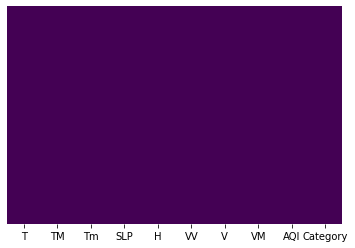

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Categorical Value Handling - (Label Encoding Method)

In [9]:
data['Category'].unique()

array(['EU', 'VU', 'C', 'U', 'M', 'G'], dtype=object)

# Import Label Encoder 

In [10]:
from sklearn import preprocessing 

In [11]:
encode = preprocessing.LabelEncoder()
data['Category'] = encode.fit_transform(data['Category'])

In [12]:
data['Category'].unique()

array([1, 5, 0, 4, 3, 2])

In [13]:
data.head()

T     TM     Tm      SLP      H    VV     V    VM    AQI  Category
0  21.10  27.60  14.80  1018.80  66.00  1.80  0.60  3.50  388.0         1
1  21.50  27.00  14.20  1018.00  64.00  2.60  2.40  9.40  312.0         1
2  20.90  25.80  14.80  1016.50  63.00  2.60  2.20  9.40  305.0         1
3  19.94  24.91  14.77  1015.23  65.27  1.94  1.91  6.12  307.0         1
4  19.94  24.91  14.77  1015.23  65.27  1.94  1.91  6.12  294.0         5

# Correalation Matrix

In [14]:
data.corr()

T        TM        Tm       SLP         H        VV  \
T         1.000000  0.947261  0.953114 -0.831003  0.383009  0.831129   
TM        0.947261  1.000000  0.851205 -0.705850  0.201436  0.826496   
Tm        0.953114  0.851205  1.000000 -0.870998  0.575639  0.775596   
SLP      -0.831003 -0.705850 -0.870998  1.000000 -0.584822 -0.681008   
H         0.383009  0.201436  0.575639 -0.584822  1.000000  0.272773   
VV        0.831129  0.826496  0.775596 -0.681008  0.272773  1.000000   
V         0.374142  0.297247  0.365051 -0.462819  0.246824  0.323998   
VM        0.229379  0.205784  0.208437 -0.266988  0.181492  0.204286   
AQI      -0.784004 -0.667606 -0.829697  0.767863 -0.576105 -0.689100   
Category -0.132819 -0.088083 -0.159550  0.202190 -0.223342 -0.067910   

                 V        VM       AQI  Category  
T         0.374142  0.229379 -0.784004 -0.132819  
TM        0.297247  0.205784 -0.667606 -0.088083  
Tm        0.365051  0.208437 -0.829697 -0.159550  
SLP      -0.462819 -0.266988  0.767863  0.202190  
H         0.246824  0.181492 -0.576105 -0.223342  
VV        0.323998  0.204286 -0.689100 -0.067910  
V         1.000000  0.706649 -0.409164 -0.151698  
VM        0.706649  1.000000 -0.242374 -0.098351  
AQI      -0.409164 -0.242374  1.000000  0.077317  
Category -0.151698 -0.098351  0.077317  1.000000

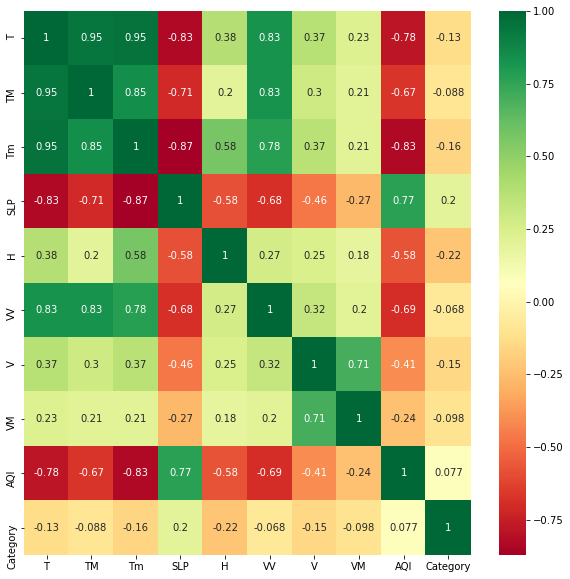

In [15]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
X = data.iloc[:,:-2] ##independent features
y = data.iloc[:,-2]  ##dependent features

In [17]:
X.head()

T     TM     Tm      SLP      H    VV     V    VM
0  21.10  27.60  14.80  1018.80  66.00  1.80  0.60  3.50
1  21.50  27.00  14.20  1018.00  64.00  2.60  2.40  9.40
2  20.90  25.80  14.80  1016.50  63.00  2.60  2.20  9.40
3  19.94  24.91  14.77  1015.23  65.27  1.94  1.91  6.12
4  19.94  24.91  14.77  1015.23  65.27  1.94  1.91  6.12

In [18]:
y.head()

0    388.0
1    312.0
2    305.0
3    307.0
4    294.0
Name: AQI, dtype: float64

In [19]:
y.isnull().sum()

0

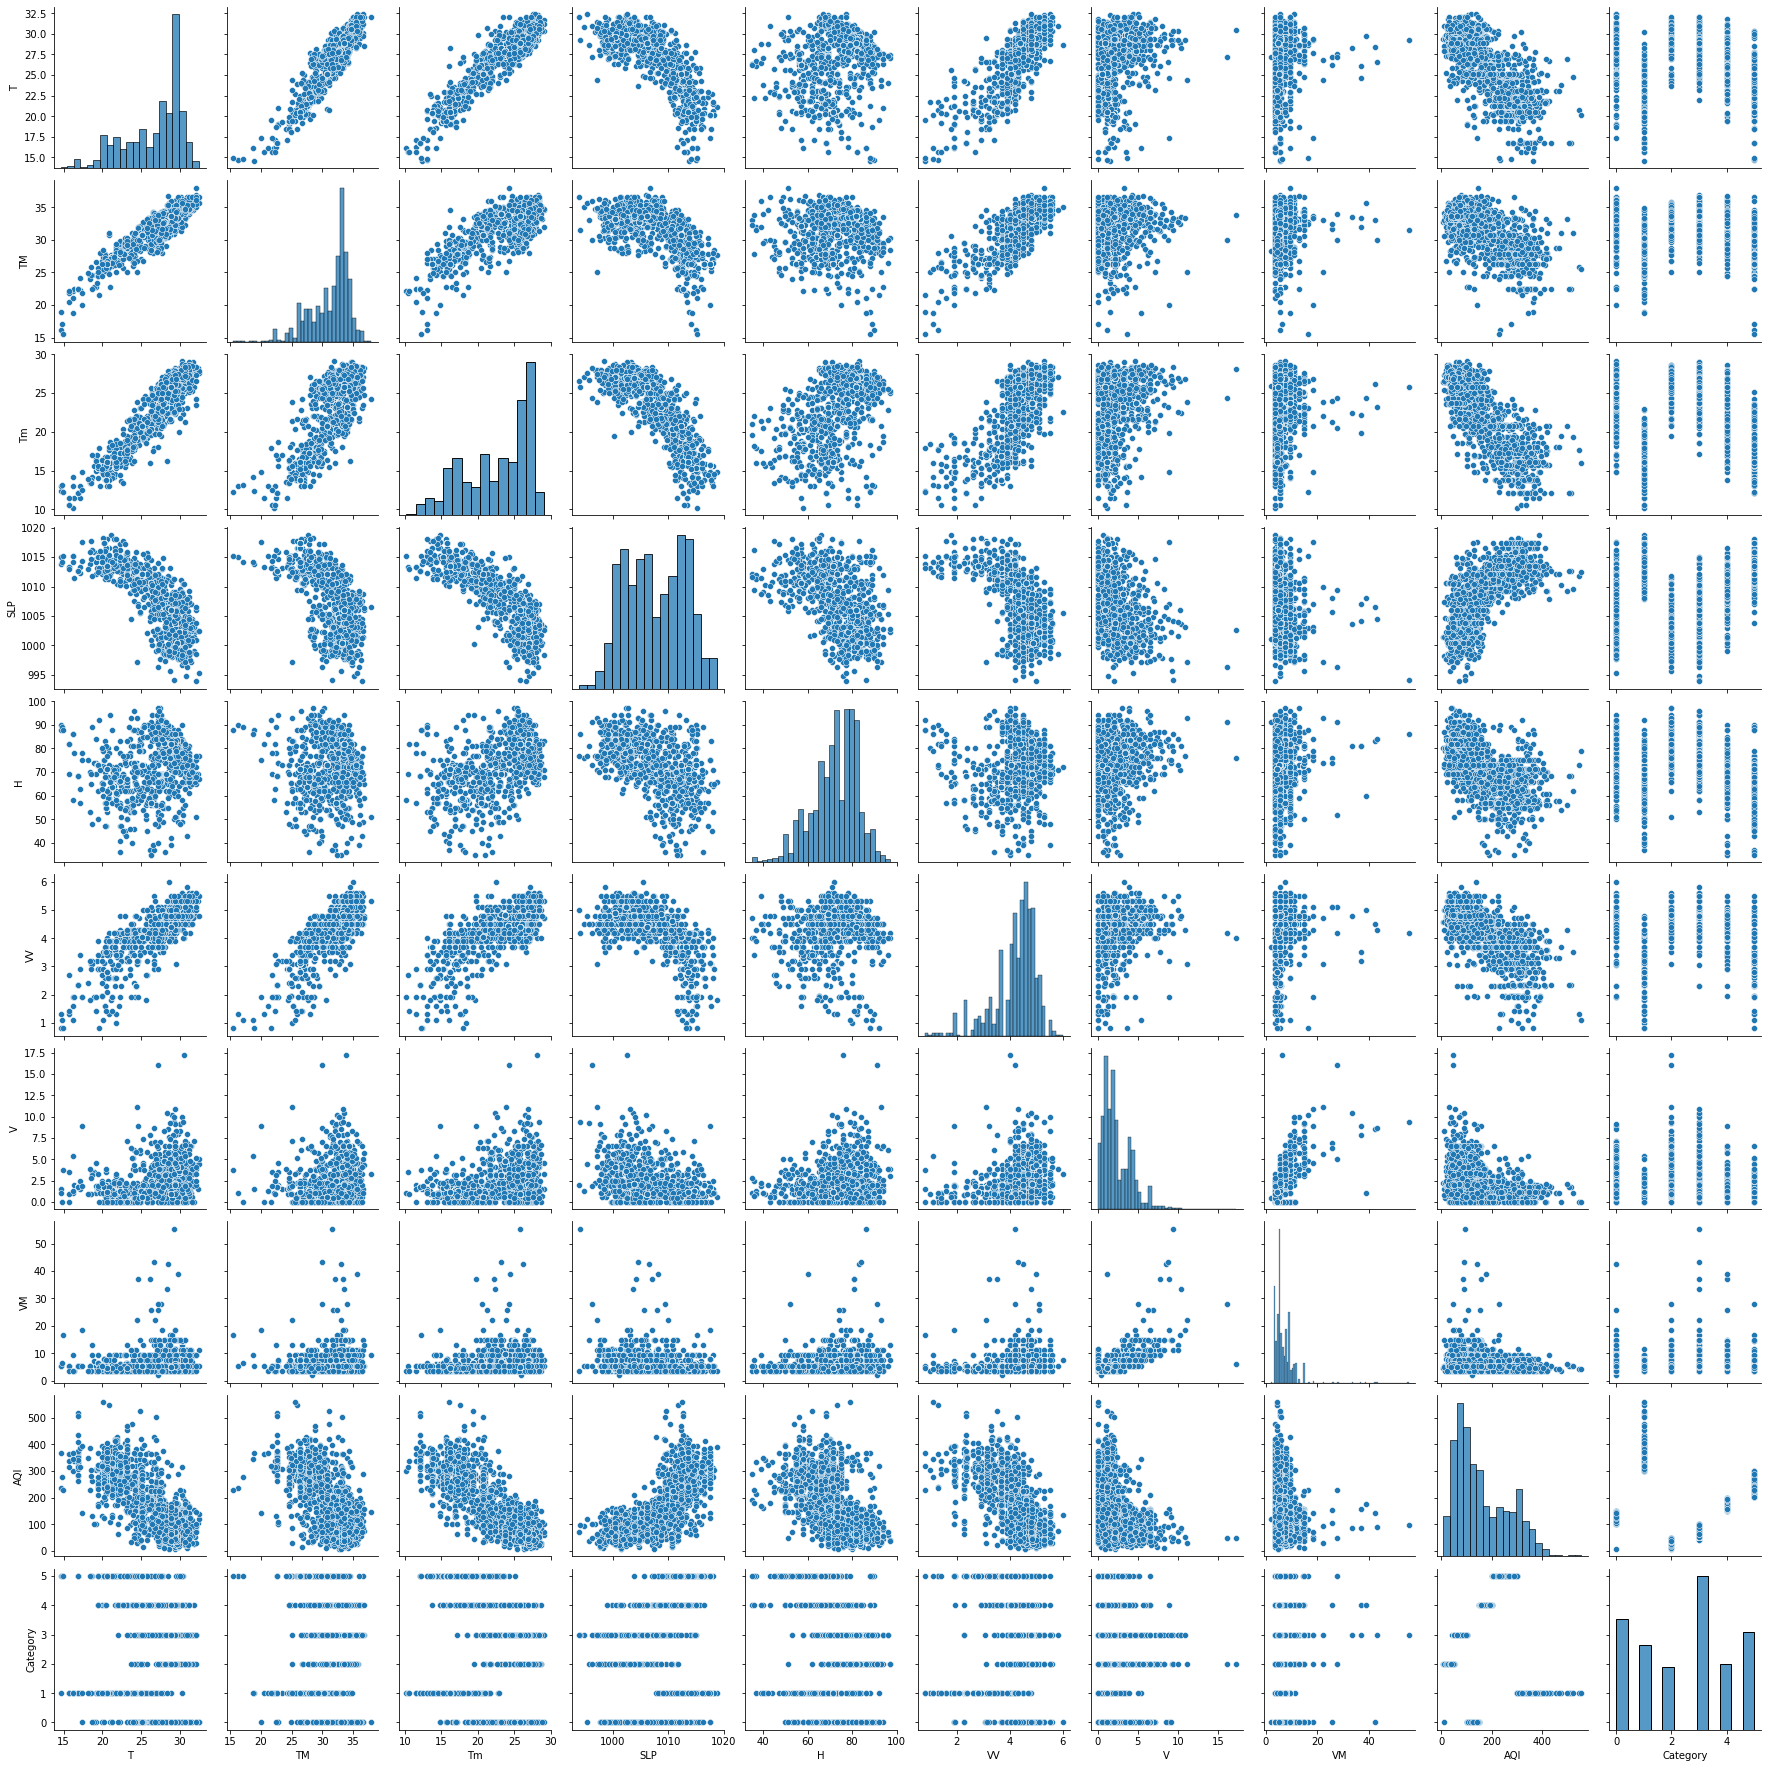

In [20]:
sns.pairplot(data)

# Feature Importance

We are using Extra Tree Regressor to find out top features from dataset.

In [21]:
from sklearn.ensemble import ExtraTreesRegressor

In [22]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [23]:
print(model.feature_importances_)

[0.19939851 0.04932147 0.41671323 0.15483556 0.06285324 0.06625817
 0.02806953 0.0225503 ]


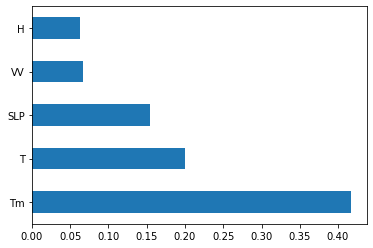

In [24]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\Rutton\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

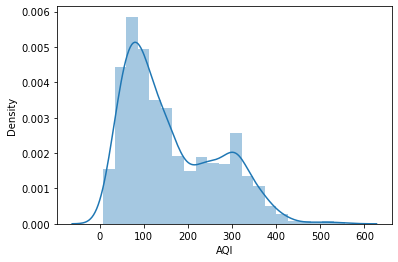

In [25]:
sns.distplot(y,kde=True)

# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# M-4: Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dtree=DecisionTreeRegressor(criterion='mse')

In [30]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [64]:
round(dtree.score(X_train,y_train)*100,2)

88.05

In [66]:
round(dtree.score(X_test,y_test)*100,2)

63.49

In [63]:
# Cross Validation

from sklearn.model_selection import cross_val_score
score = cross_val_score(dtree,X_train,y_train,cv=5)
round(score.mean()*100,2)

63.96

# Tree Visualization

In [35]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [36]:
features = list(data.columns[:-2])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [37]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [38]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.925491 to fit



# Model Evaluation

In [44]:
from sklearn import metrics
prediction=dtree.predict(X_test)

C:\Users\Rutton\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

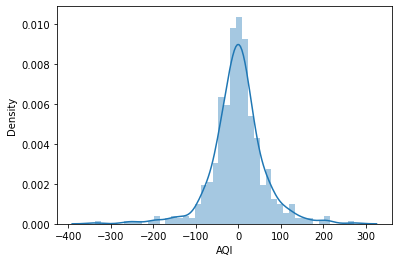

In [45]:
sns.distplot(y_test-prediction,kde=True)

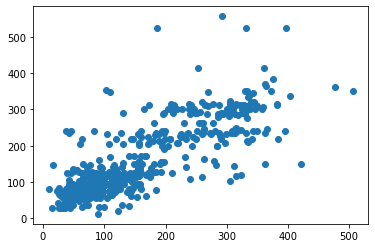

In [46]:
plt.scatter(y_test,prediction)

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 41.969026049206775
MSE: 3845.291499537233
RMSE: 62.01041444416602


# Hyperparameter Tuning

In [48]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [49]:
#Hyper Parameter Optimization

params={   
    "splitter" : ["best","random"],
    "max_depth" : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_samples_leaf" : [1, 2, 3, 4, 5],
    "min_weight_fraction_leaf" : [0.1, 0.2, 0.3, 0.4, 0.5],
    "max_features" : ["auto", "log2", "sqrt", None],
    "max_leaf_nodes" : [None, 10, 20, 30, 40, 50, 60, 70] 
}

In [50]:
#Hyparparameter optimization

from sklearn.model_selection import GridSearchCV

In [51]:
search=GridSearchCV(dtree,param_grid=params,scoring='r2',n_jobs=-1,cv=10,verbose=3)

In [52]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [53]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 12800 candidates, totalling 128000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 6672 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 11280 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 16912 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 23568 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 31248 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 39952 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 49680 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 60432 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 72208 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 85008 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 98832 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 113680


 Time taken: 0 hours 2 minutes and 44.45 seconds.


In [54]:
search.best_params_

{'max_depth': 12,
 'max_features': 'log2',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [56]:
round(search.best_score_*100,2)

70.04

# Model Evaluation

In [57]:
predictions=search.predict(X_test)

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 41.60602512648388
MSE: 3308.8749654646444
RMSE: 57.52282125786812
